# Market Verileri

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

In [2]:
data = pd.read_csv("market.csv")
data.shape

(1000, 17)

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Veri Temizleme

In [5]:
# Eksik veri varsa kaç tane eksik veri olduğunu göstermek istedik
# Dosyamızda hiç eksik veri olmadığnı görüyoruz. Bu yüzden görselleştirme adımına geçebiliriz

data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Veri setinin bilgilerine ulaşma

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# SADECE sayısal veriye sahip sütunların özet istatistiklerini görmüş olduk

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
# Satır ve sütunların kontrolü
# shape[0] axis0 yani x ekseni, satır demek. 1 de aynı şekilde y ekseni, sütun demek

print("Veri seti {} satır ve {} sütun içeriyor.".format(data.shape[0], data.shape[1]))

Veri seti 1000 satır ve 17 sütun içeriyor.


## Görselleştirme

### Markette Bulunan Müşterilerin Cinsiyet Dağılımı

Text(0, 0.5, 'Gender Count')

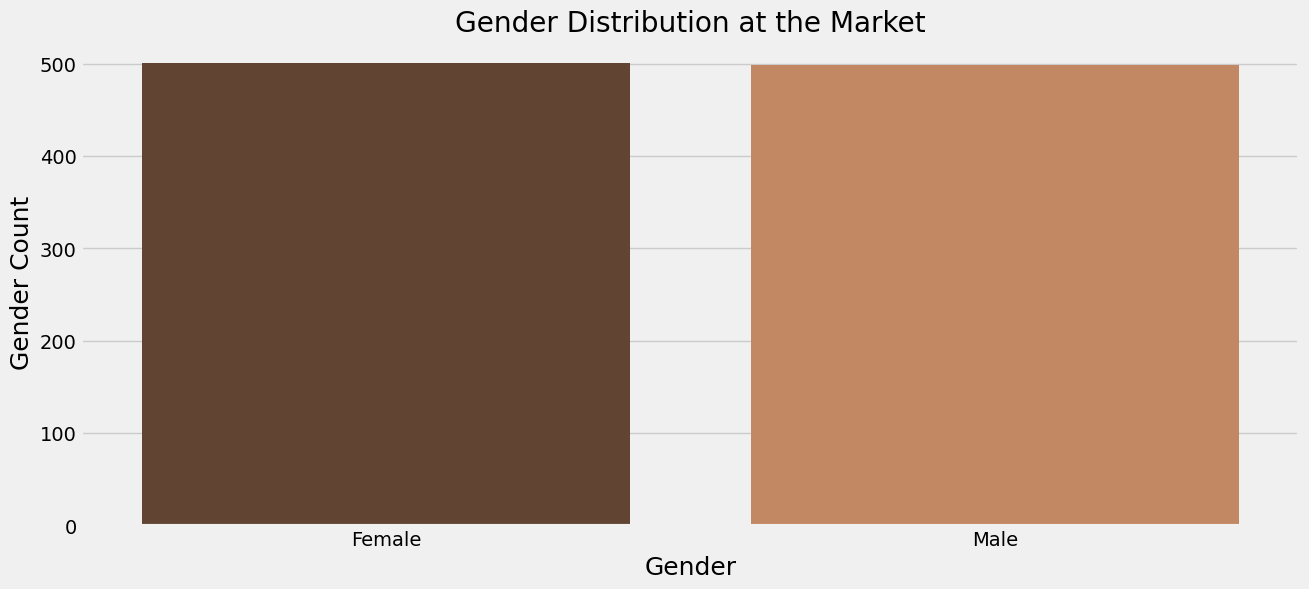

In [17]:
plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
# Cinsiyet sütunundaki sayıların verilerini hesaplama
# countplot ile seçilen kategorideki veriler bar grafiği ile gösterilir
ax = sns.countplot(x="Gender", data=data, palette="copper")
# Grafiğin başlığını oluştura: title
ax.set_title("Gender Distribution at the Market")
# Grafiğin X eksenini oluşturma: xlabel= x ekseninin başlığını oluşturur
ax.set_xlabel("Gender", fontsize=18)
# Grafiğin Y eksenini oluşturma: ylabel= y ekseninin başlığını oluşturur
ax.set_ylabel("Gender Count", fontsize=18)

In [16]:
# Grafik sağlıklı bir yorum sunmadığı için verilerin sayısal istatistiklerini görmemiz gerekiyor.
data.groupby(["Gender"]).agg({"Total":"sum"})

,Total
Gender,
Female,167882.925
Male,155083.824


### Müşteri Tipleri

Text(0, 0.5, 'Number of Customer')

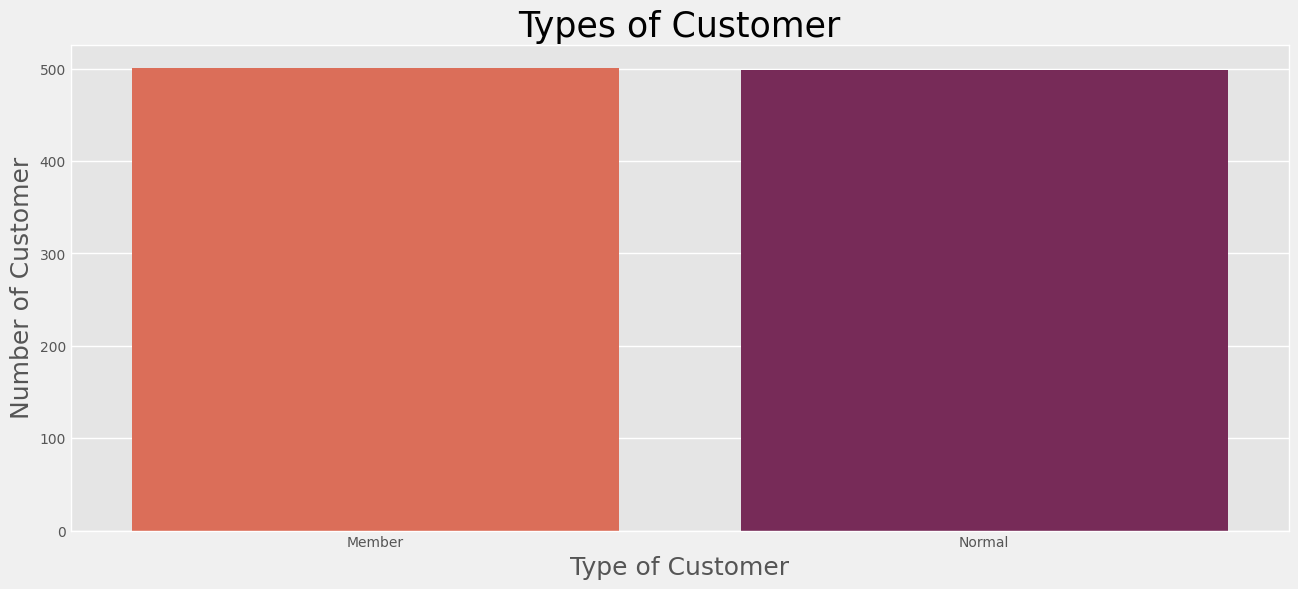

In [18]:
plt.figure(figsize=(14,6))
plt.style.use("ggplot")
ax = sns.countplot(x="Customer type", data=data, palette="rocket_r")
ax.set_title("Types of Customer", fontsize=25)
ax.set_xlabel("Type of Customer", fontsize=18)
ax.set_ylabel("Number of Customer", fontsize=18)

In [19]:
# Grafik sağlıklı bir yorum sunmadığı için verilerin sayısal istatistiklerini görmemiz gerekiyor.
data.groupby(["Customer type"]).agg({"Total":"sum"})

,Total
Customer type,
Member,164223.444
Normal,158743.305


### Ödeme Yöntemleri

Text(0, 0.5, 'Number of Customers')

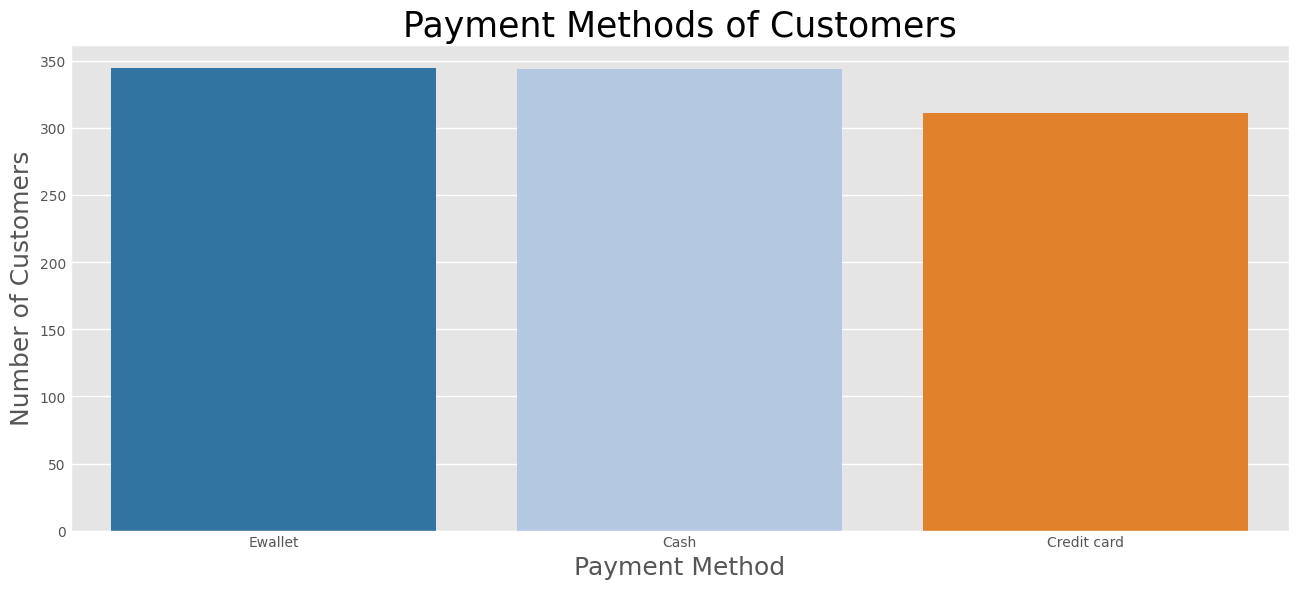

In [20]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x="Payment", data=data, palette="tab20")
ax.set_title("Payment Methods of Customers", fontsize=25)
ax.set_xlabel("Payment Method", fontsize=18)
ax.set_ylabel("Number of Customers", fontsize=18)

In [21]:
# Yukarıdaki grafikte Ewallet ile cash sağlıklı bir yorum sunmadığı için verilerin sayısal istatistiklerini görmemiz gerekebilir.

data.groupby(["Payment"]).agg({"Total":"sum"})

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


### En Fazla Satışın Yapıldığı Zaman

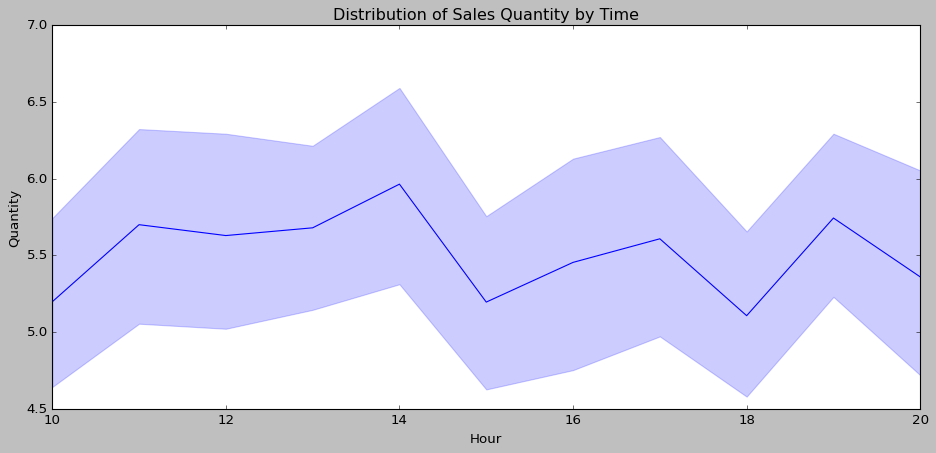

In [32]:
# Zaman verilerinin zaman serisi şeklinde kullanılması

data["Time"] = pd.to_datetime(data["Time"])
# Verilere saat değişkeni şeklinde işlemler yapacacağımızı belirtiyoruz
data["Hour"] = (data["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use("classic")
SellingTime = sns.lineplot(x="Hour", y="Quantity", data=data).set_title("Distribution of Sales Quantity by Time")
# .set_title("Distribution of Sales Quantity by Time") kaldırıp yeni satırda
# SellingTime.set_title("Distribution of Sales Quantity by Time")

### Hangi Ürünün Ne Kadar Sattığını Hesaplama

Text(0, 0.5, 'Product Information')

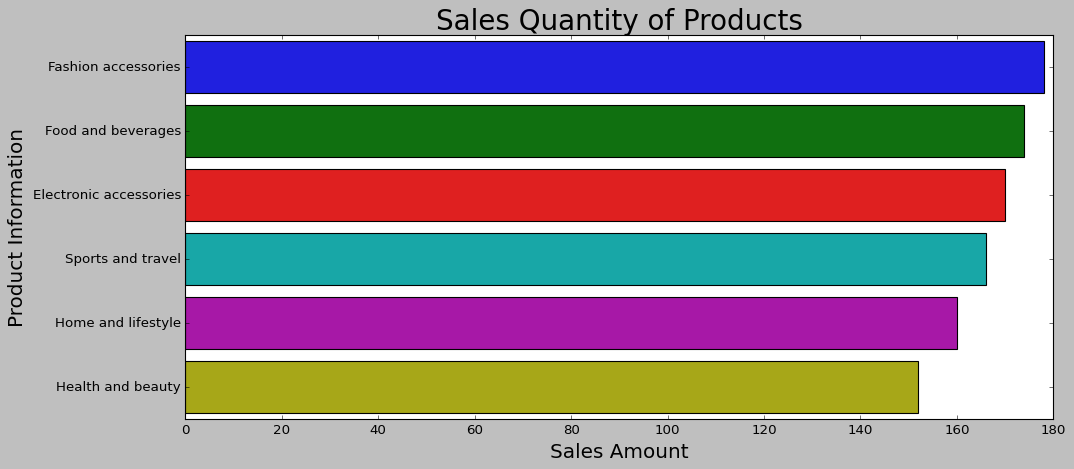

In [36]:
plt.figure(figsize=(14,6))
# value_counts ile değerler hesaplanır, countplot ile sayısal verilerler grafikleştirilir
ax = sns.countplot(y="Product line", data=data, order=data["Product line"].value_counts().index)
ax.set_title("Sales Quantity of Products", fontsize=25)
ax.set_xlabel("Sales Amount", fontsize=18)
ax.set_ylabel("Product Information", fontsize=18)